CIFAR10 분류 실습

- 60,000개 이미지 (학습 5만개, 테스트 1만개)
- 32X32 컬러 이미지
- 10개 클래스 (클래스당 6,000개 이미지)

Label	Description
* 0	airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck

데이터 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


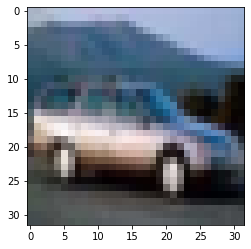

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[4])

In [ ]:
train_labels[4]

array([1], dtype=uint8)

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [ ]:
train_images.shape

(45000, 32, 32, 3)

CNN 모형 생성

- LeNet-5
(Yann LeCun et al., "Gradient-Based Learning Applied to Document Recognition," Proceedings of the IEEE 86, no. 11 (1998): 2278-2324)

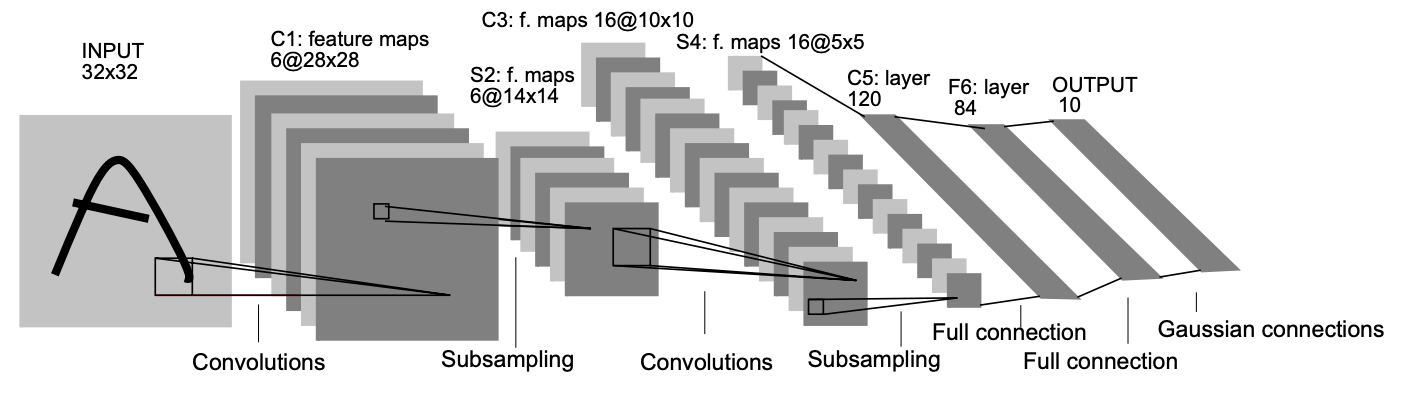

In [ ]:
from tensorflow.keras import layers 

inputs = keras.Input(shape=(32, 32, 3)) 
x = layers.Conv2D(filters=6, kernel_size=5, activation="tanh", padding="valid")(inputs)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=16, kernel_size=5, activation="tanh", padding="valid")(x)
x = layers.AveragePooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=120, kernel_size=5, activation="tanh")(x)
x = layers.Flatten()(x) 
x = layers.Dense(84, activation="tanh")(x)
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0     

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="rmsprop", 
              metrics=["accuracy"])

callbacks = [ 
  keras.callbacks.ModelCheckpoint( 
      filepath="cnn_cifar10.h5", 
      save_best_only=True, 
      monitor="val_loss") ] 

history = model.fit( 
    train_images, 
    train_labels,
    epochs=50, 
    validation_data=(validation_images, validation_labels),
    callbacks=callbacks)

Epoch 1/50
1407/1407 [==============================] - 38s 6ms/step - loss: 1.8136 - accuracy: 0.3596 - val_loss: 1.6900 - val_accuracy: 0.4094
Epoch 2/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5725 - accuracy: 0.4457 - val_loss: 1.6446 - val_accuracy: 0.4120
Epoch 3/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4288 - accuracy: 0.4931 - val_loss: 1.4298 - val_accuracy: 0.4904
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3479 - accuracy: 0.5236 - val_loss: 1.3530 - val_accuracy: 0.5220
Epoch 5/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2834 - accuracy: 0.5448 - val_loss: 1.3940 - val_accuracy: 0.5102
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2325 - accuracy: 0.5644 - val_loss: 1.3232 - val_accuracy: 0.5284
Epoch 7/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1882 - accuracy: 0.5784 - val_loss: 1.3062 - val_accurac

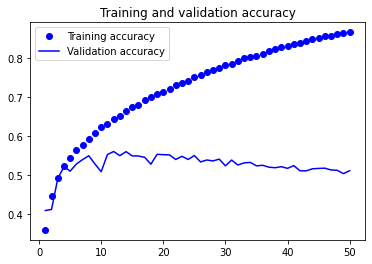

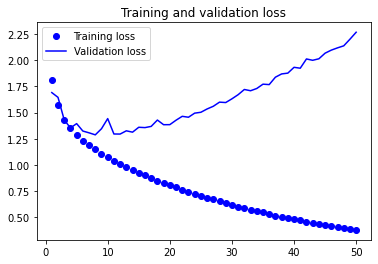

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"] 
val_accuracy = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(accuracy) + 1) 
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [ ]:
test_model = keras.models.load_model("cnn_cifar10.h5") 
test_loss, test_acc = test_model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 1.3014 - accuracy: 0.5437
Test accuracy: 0.544


전이학습
- ResNet (Microsoft)
- ILSVRC 2015 오차율 3.57기록
- Keras에 포함된 사전 훈련 모형 중 ResNet50

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import resnet50

conv_base = resnet50.ResNet50(
    weights="imagenet", 
    include_top=False, 
    input_shape=(32, 32, 3))

In [ ]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
data_augmentation = keras.Sequential( 
    [ layers.experimental.preprocessing.RandomFlip("horizontal"), 
     layers.experimental.preprocessing.RandomRotation(0.1), 
     layers.experimental.preprocessing.RandomZoom(0.2), 
     ] 
)

inputs = keras.Input(shape=(32, 32, 3)) 
x = data_augmentation(inputs) 
x = conv_base(x) 
x = layers.Flatten()(x) 
x = layers.Dense(256)(x) 
x = layers.Dropout(0.5)(x) 
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x) 
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [ keras.callbacks.ModelCheckpoint(
    filepath="cnn_cifar10_transfer.h5",
    save_best_only=True,
    monitor="val_loss")
] 

history = model.fit(
    train_images,
    train_labels, 
    epochs=30, 
    validation_data=(validation_images, validation_labels), 
    callbacks=callbacks)

Epoch 1/50
1407/1407 [==============================] - 216s 137ms/step - loss: 3.2434 - accuracy: 0.1734 - val_loss: 1.9567 - val_accuracy: 0.2450


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
1407/1407 [==============================] - 188s 134ms/step - loss: 1.8120 - accuracy: 0.3233 - val_loss: 1.6131 - val_accuracy: 0.4444
Epoch 3/50
1407/1407 [==============================] - 188s 134ms/step - loss: 1.5912 - accuracy: 0.4284 - val_loss: 3.0163 - val_accuracy: 0.2012
Epoch 4/50
1407/1407 [==============================] - 188s 134ms/step - loss: 1.4883 - accuracy: 0.4758 - val_loss: 1.5378 - val_accuracy: 0.4668
Epoch 5/50
1407/1407 [==============================] - 188s 134ms/step - loss: 1.4054 - accuracy: 0.5159 - val_loss: 1.5659 - val_accuracy: 0.4956
Epoch 6/50
1407/1407 [==============================] - 190s 135ms/step - loss: 1.3517 - accuracy: 0.5368 - val_loss: 1.5153 - val_accuracy: 0.5206
Epoch 7/50
1407/1407 [==============================] - 189s 134ms/step - loss: 1.2997 - accuracy: 0.5564 - val_loss: 2.3493 - val_accuracy: 0.4652
Epoch 8/50
1407/1407 [==============================] - 188s 134ms/step - loss: 1.2693 - accuracy: 0.5728 - val_

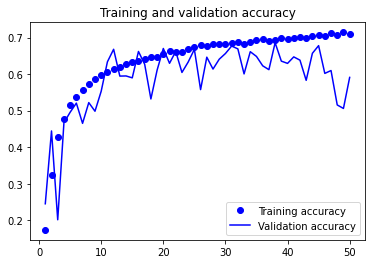

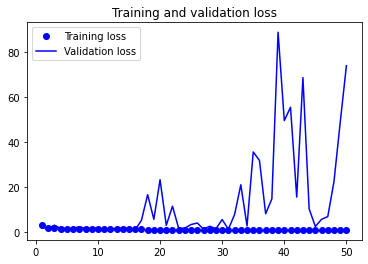

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, "bo", label="Training accuracy") 
plt.plot(epochs, val_acc, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [ ]:
test_model = keras.models.load_model("cnn_cifar10_transfer.h5") 
test_loss, test_acc = test_model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 9s 26ms/step - loss: 1.0302 - accuracy: 0.6581
Test accuracy: 0.658
